In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there in no missing value in the dataset
there are 1000 records and 8 features.


In [8]:
df.duplicated().sum()

np.int64(0)

No duplicate value in the dataset.


In [15]:
print("unique values in each column")
print(f"lunch : {df['lunch'].unique()}")
print(f"race_ethnicity : {df['race_ethnicity'].unique()}")
print(f"parental_level_of_education : {df['parental_level_of_education'].unique()}")
print(f"test_preparation_course : {df['test_preparation_course'].unique()}")

unique values in each column
lunch : ['standard' 'free/reduced']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
test_preparation_course : ['none' 'completed']


In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


means of all score are similar to each other.<br>
standard deviation of all score are similar to each other.<br>
minimum score in math is 0 but in reading and writing is 17 and 10 respectivily.

In [19]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype == 'O']

In [21]:
print(f"numerical features are {numerical_feature}")
print(f"categorical features are {categorical_feature}")

numerical features are ['math_score', 'reading_score', 'writing_score']
categorical features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns of total_score and average_score

In [23]:
df["Total_score"]=df["reading_score"]+df["writing_score"]+df["math_score"]
df["average"]=df["Total_score"]/3

In [24]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [27]:
df[numerical_feature].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [44]:
maths_fullmarks=int(df[df["math_score"]==100]['average'].count())
print(f"no of student get full marks in maths = {maths_fullmarks}")
reading_fullmarks=int(df[df["reading_score"]==100]['average'].count())
print(f"no of student get full marks in reading = {reading_fullmarks}")
writing_fullmarks=int(df[df["writing_score"]==100]['average'].count())
print(f"no of student get full marks in writing = {writing_fullmarks}")

no of student get full marks in maths = 7
no of student get full marks in reading = 17
no of student get full marks in writing = 14


In [45]:
maths_less20=int(df[df["math_score"]<=20]['average'].count())
print(f"no of student get less than 20 marks in maths = {maths_less20}")
reading_less20=int(df[df["reading_score"]<=20]['average'].count())
print(f"no of student get less than 20 marks in reading = {reading_less20}")
writing_less20=int(df[df["writing_score"]<=20]['average'].count())
print(f"no of student get less than 20 marks in writing = {writing_less20}")

no of student get less than 20 marks in maths = 4
no of student get less than 20 marks in reading = 1
no of student get less than 20 marks in writing = 3


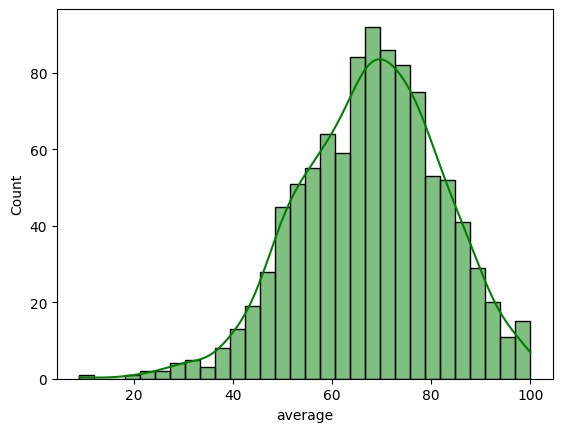

In [46]:
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.show()

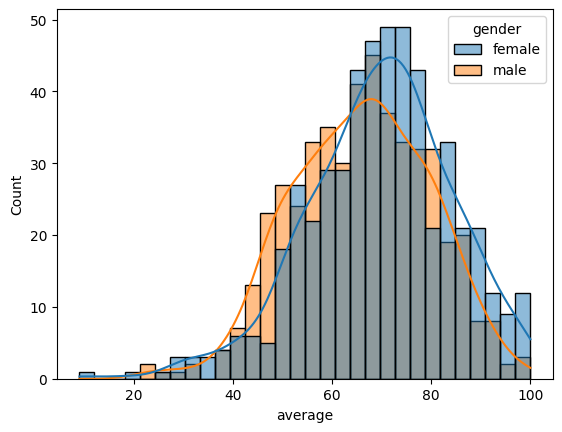

In [47]:
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

average performance of female student is less than male student

In [48]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


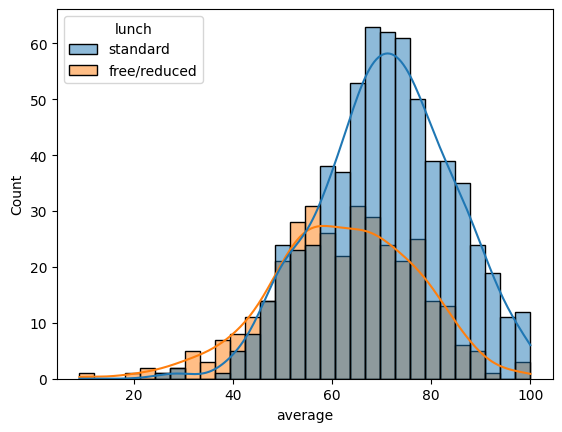

In [49]:
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.show()

student have standard lunch perform well.

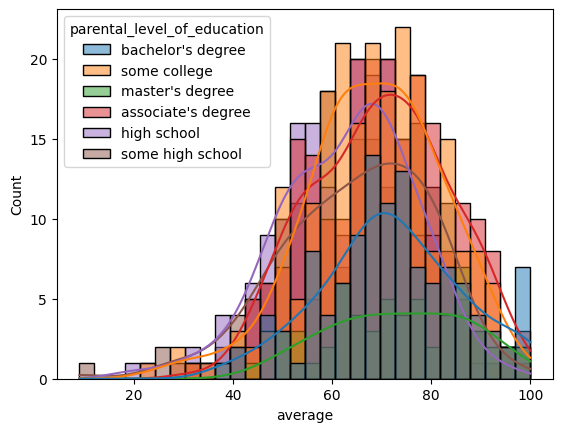

In [52]:
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental_level_of_education')
plt.show()

student whose parents have master degree peform poor<br>
performance wrt to parental degree status<br>
master_degree< bacherlor's degree< some high school< high school = associate's degree=some college

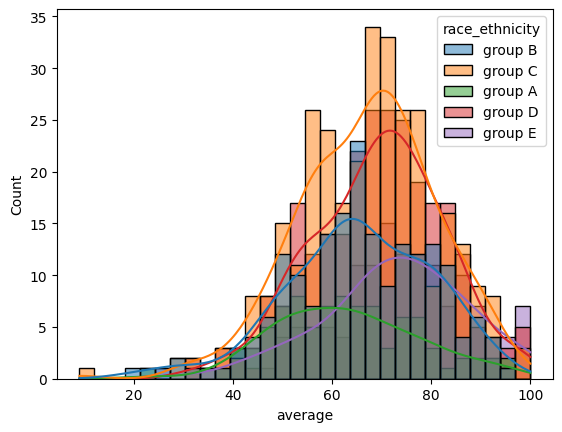

In [53]:
sns.histplot(data=df,x='average',bins=30,kde=True,hue='race_ethnicity')
plt.show()